## Set Up Environment

In [213]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import umap
%matplotlib inline

In [214]:
# Set plotting settings
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
# Color palettes for organs
scimap = ["#A50CFA", "#FF804B", "#009800", "#B90000", "#FF0000", 
          "#0000FF", "#660000", "#61FFE2", "#00FF82", "#FF86FF", "#FFB623", 
          "#FFFF00"]
sns.set_palette(scimap)

## Loading data

In [215]:
data = pd.read_csv("https://raw.githubusercontent.com/cns-iu/hra-cell-type-populations-supporting-information/main/ad_hoc_queries/output/umap_datasets_as_percentage.csv")
data.head()

,dataset_id,organ,jejunum,descending colon,superior part of duodenum,descending part of duodenum,ascending part of duodenum,horizontal part of duodenum,sigmoid colon,distal part of ileum,...,diaphragmatic surface of liver,capsule of the liver,left cardiac atrium,right cardiac atrium,Posteromedial head of posterior papillary muscle of left ventricle,Lateral segmental bronchus,Left apical bronchopulmonary segment,central zone of prostate,peripheral zone of prostate,Interlobar adipose tissue of right mammary gland
0,https://entity.api.hubmapconsortium.org/entiti...,VHFSmallIntestine,0.103,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,https://entity.api.hubmapconsortium.org/entiti...,VHFColon,0.000,0.883,0.000,0.000,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,https://entity.api.hubmapconsortium.org/entiti...,VHFSmallIntestine,0.000,0.000,0.026,0.032,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,https://entity.api.hubmapconsortium.org/entiti...,VHFSmallIntestine,0.000,0.000,0.000,0.000,0.051,0.092,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,https://entity.api.hubmapconsortium.org/entiti...,VHFColon,0.000,0.000,0.000,0.000,0.000,0.000,0.052,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


## Preparing Categorical Variables

First we assign create a biological sex variable and assign its data type.

In [216]:
data['sex'] = np.where(data['organ'].str.contains('VHF'),'female','male')
data.sex = data.sex.astype("category")

Next, we process text data in the 'Organ' variable and assign the data type.

In [217]:
data.organ = data.organ.str.replace("VHF","", regex=True)
data.organ = data.organ.str.replace("VHM","", regex=True)
data.organ = data.organ.str.replace("Left","", regex=True)
data.organ = data.organ.str.replace("Right","", regex=True)
data.organ = data.organ.str.replace("Small","Small ", regex=True)
data.organ = data.organ.str.replace("Large","Large ", regex=True)
data.organ = data.organ.str.replace("Colon","Large Intestine", regex=True)
data.organ = data.organ.str.replace("Mammary","Mammary ", regex=True)
data.organ = data.organ.str.replace("Urinary","Urinary ", regex=True)
data.organ = data.organ.astype("category")
data['organCode'] = data['organ'].cat.codes

Then we create a dataframe with dataset identifiers and categorical variables.

In [218]:
data_cat = data[['dataset_id','organ','sex']].drop_duplicates()

Here, we subset the dataset to include only the cell type percentage variables used in the UMAP analysis.

In [219]:
#data.shape[0]
data_umap = data.iloc[0:553, 3:42]

## UMAP Analysis

### UMAP - Euclidean Distance
The first UMAP analysis uses *Euclidean Distance* as the measure for the metric hyperparameter. The minimun distance hyperparameter is set to *1* and the neighborhood hyperparameter is set to *15*; note these two hyperparameters are maintained throughout the other UMAP tests to allow comparison of different metrics.


In [220]:
reducer1 = umap.UMAP(n_neighbors=15, min_dist=1, n_components=2, metric='euclidean')
embedding = reducer1.fit_transform(scaled_data_umap)

In [221]:
# Creates data frame with original dataset ids and categories (organs and sex)
embedding = pd.concat([data_cat, pd.DataFrame(embedding, columns=['0','1'])], axis=1) 

In [222]:
# Creates a subset for small intestine results
embedding_si = embedding[embedding["organ"].isin({'Small Intestine'})]
embedding_si = pd.concat([embedding_si, data[data['organ'].isin({'Small Intestine'})]], axis=1)

In [223]:
embedding_si.to_csv("umap_embed_SI", sep=',', index=False, encoding='utf-8')

#### Plotting the Results 

In [224]:
scaled_data_umap = StandardScaler().fit_transform(data_umap)
titlestring = "UMAP HRA-Pop Data Sets Tissue Percentages"

Text(0, 0.5, '')

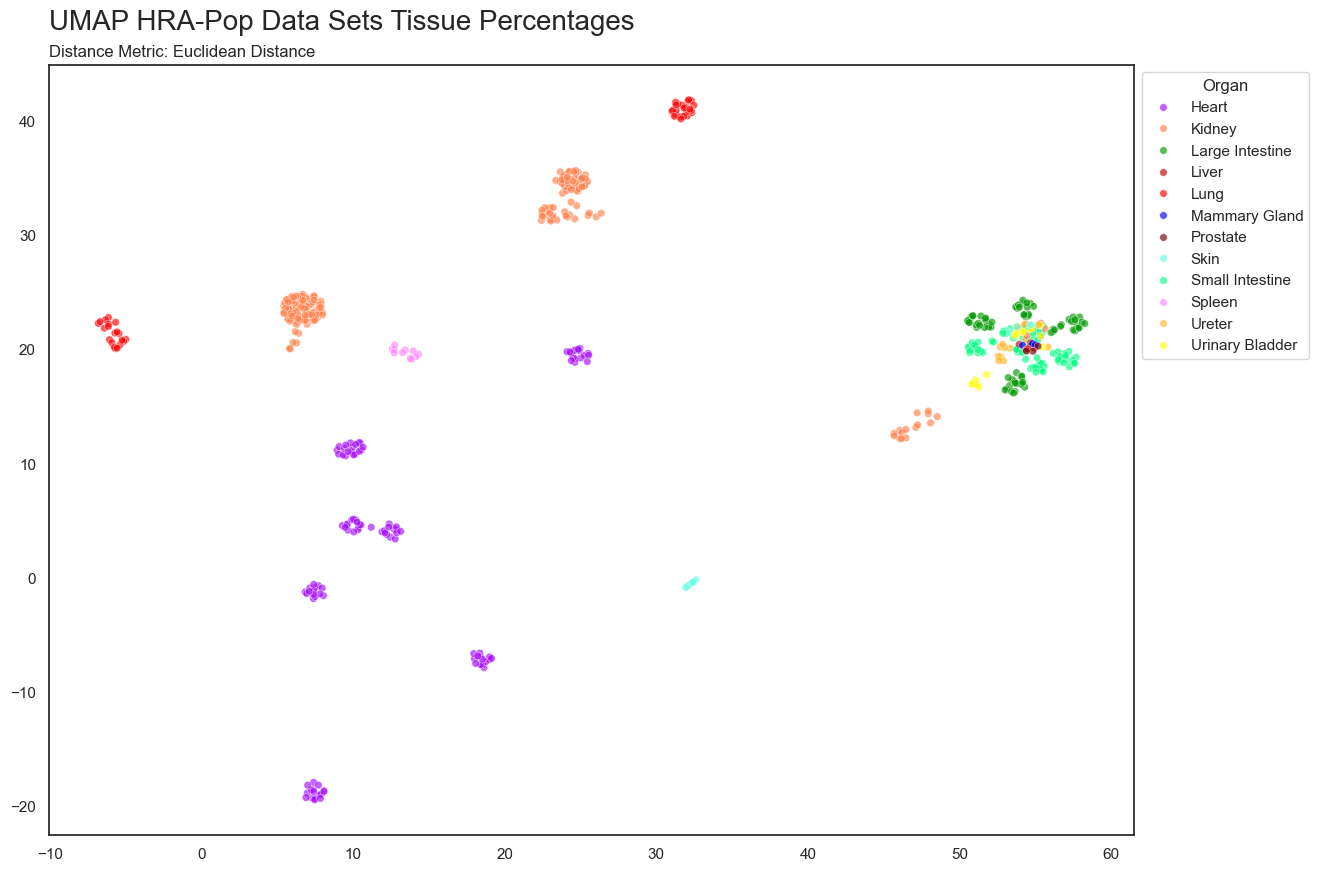

In [225]:
sns.scatterplot(x = embedding['0'], 
                y = embedding['1'], s=30,
                hue = embedding.organ, alpha=0.65)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Organ")
plt.suptitle(titlestring, x=0.334, y=.935, fontsize=20)
plt.title('Distance Metric: Euclidean Distance', loc='left', fontsize=12)
plt.xlabel(None)
plt.ylabel(None)

### UMAP - Minkowski Distance
The second UMAP analysis uses *Manhattan Distance* as the measure for the metric hyperparameter.

In [226]:
reducer2 = umap.UMAP(n_neighbors=15, min_dist=1, n_components=2, metric='minkowski')
embedding2 = reducer2.fit_transform(scaled_data_umap)

In [227]:
embedding2 = pd.concat([data_cat, pd.DataFrame(embedding2, columns=['0','1'])], axis=1) 

In [228]:
embedding2_si = embedding2[embedding2["organ"].isin({'Small Intestine'})]
embedding2_si = pd.concat([embedding2_si, data[data['organ'].isin({'Small Intestine'})]], axis=1)

#### Plotting the Results 

Text(0, 0.5, '')

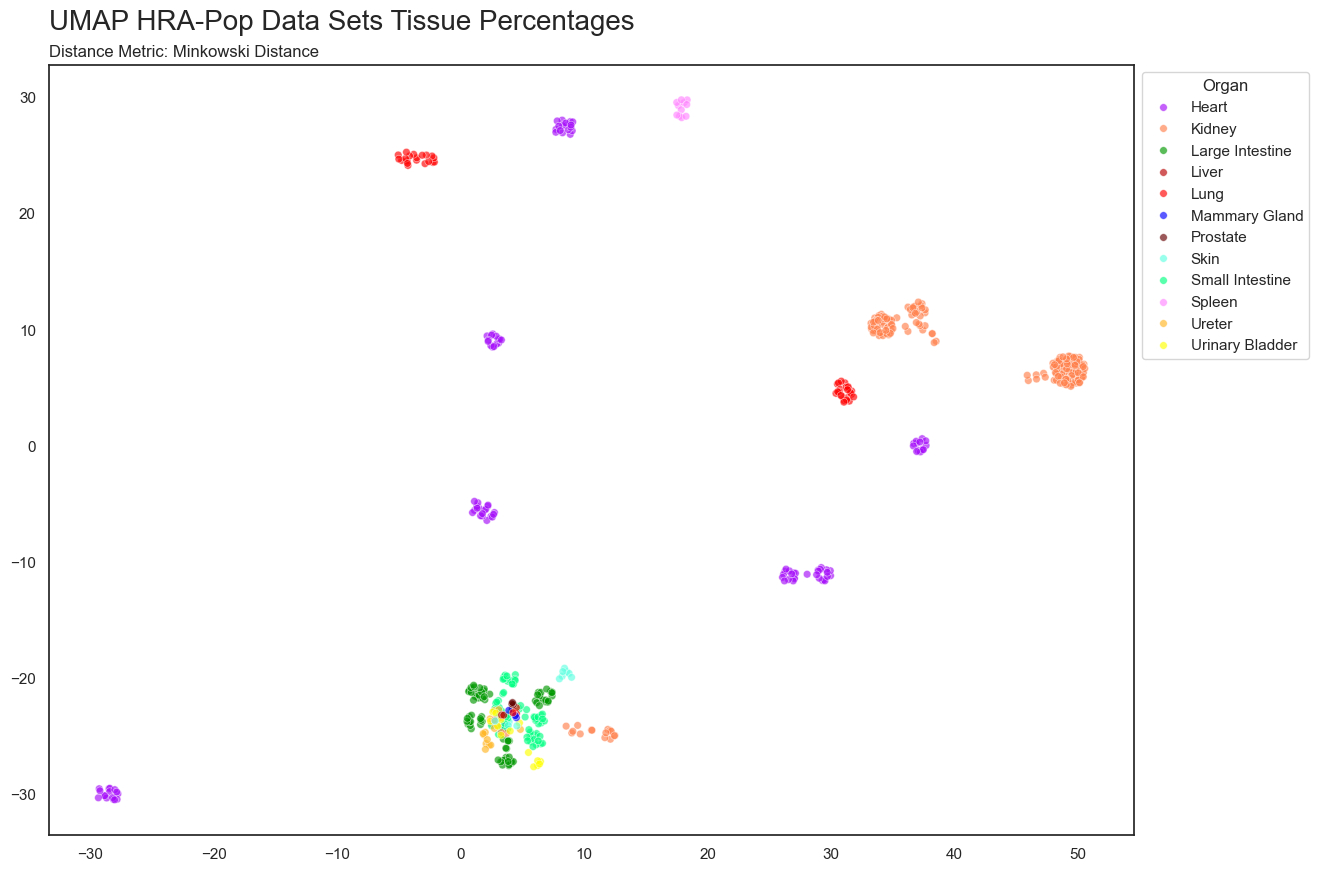

In [229]:
sns.scatterplot(x = embedding2['0'], 
                y = embedding2['1'], s=30,
                hue=embedding2.organ, alpha=0.65)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Organ")
plt.suptitle(titlestring, x=0.334, y=.935, fontsize=20)
plt.title('Distance Metric: Minkowski Distance', loc='left', fontsize=12)
plt.xlabel(None)
plt.ylabel(None)

### UMAP - Cosine Similarity
The third UMAP analysis uses *Cosine Similarity* as the measure for the metric hyperparameter.

In [230]:
reducer = umap.UMAP(n_neighbors=15, min_dist=1, n_components=2, metric='cosine')
embedding3 = reducer.fit_transform(scaled_data_umap)

In [231]:
embedding3 = pd.concat([data_cat, pd.DataFrame(embedding3, columns=['0','1'])], axis=1) 

In [232]:
embedding3_si = embedding3[embedding3["organ"].isin({'Small Intestine'})]
embedding3_si = pd.concat([embedding3_si, data[data['organ'].isin({'Small Intestine'})]], axis=1)

#### Plotting the Results

The first figure shows the UMAP results for the cosine similarity distance, with datasets colored by donor sex. The second figure shows the same plot, with data sets colored by its anatomical structures (organs). The third visualization uses a faceted grid to show UMAP placements for datasets broken out by organs.

Text(0, 0.5, '')

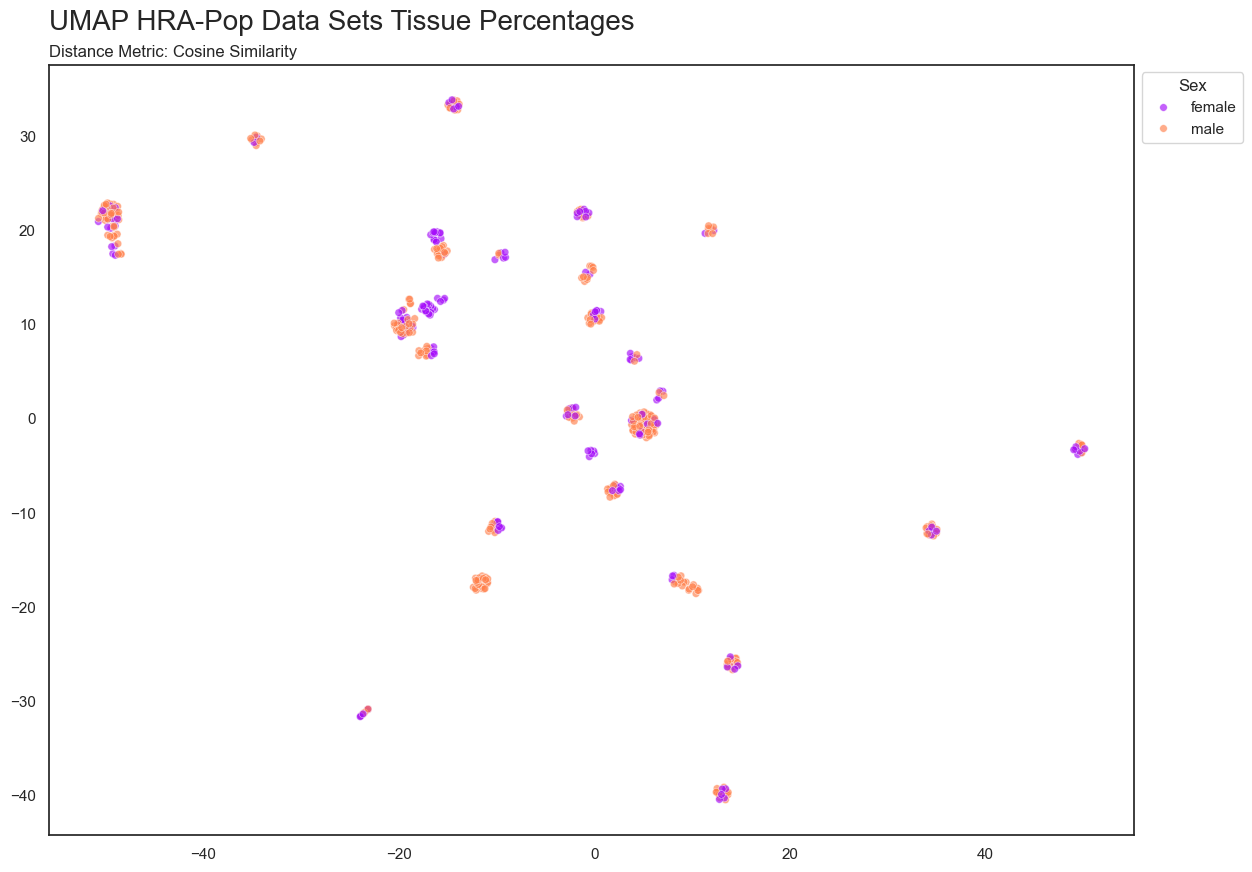

In [233]:
# UMAP Scatter Plot of Results - Sex
sns.scatterplot(x = embedding3['0'], 
                y = embedding3['1'], s=30,
                hue=embedding3.sex, alpha=0.65)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Sex")
plt.suptitle(titlestring, x=0.334, y=.935, fontsize=20)
plt.title("Distance Metric: Cosine Similarity", loc='left', fontsize=12)
plt.xlabel(None)
plt.ylabel(None)

Text(0, 0.5, '')

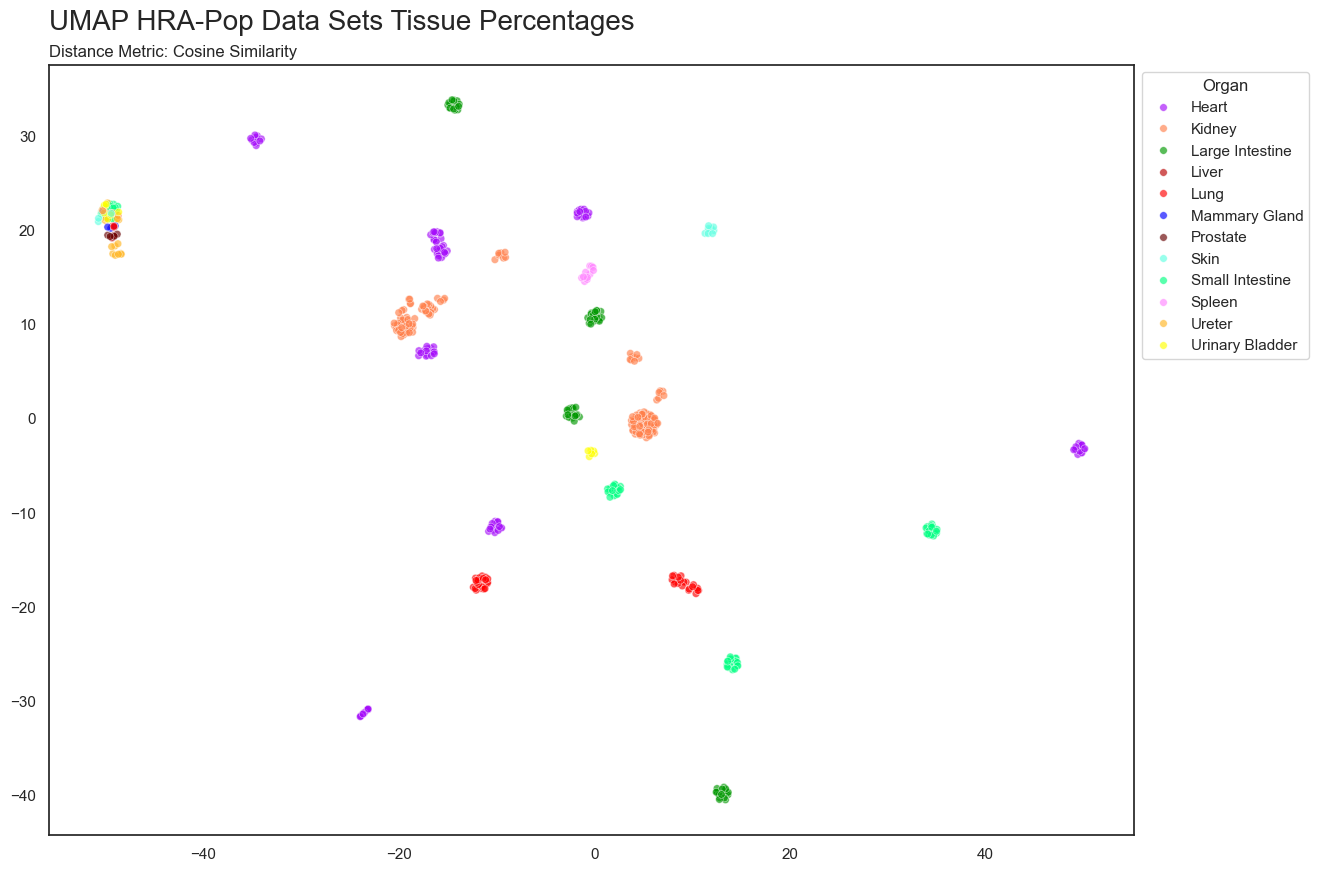

In [234]:
# UMAP Scatter Plot of Results - Organs
sns.scatterplot(x = embedding3['0'], 
                y = embedding3['1'], s=30,
                hue=embedding3.organ, alpha=0.65)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Organ")
plt.suptitle(titlestring, x=0.334, y=.935, fontsize=20)
plt.title("Distance Metric: Cosine Similarity", loc='left', fontsize=12)
plt.xlabel(None)
plt.ylabel(None)

Text(0.424, 1.02, 'UMAP HRA-Pop Data Sets Tissue Percentages: by Organ')

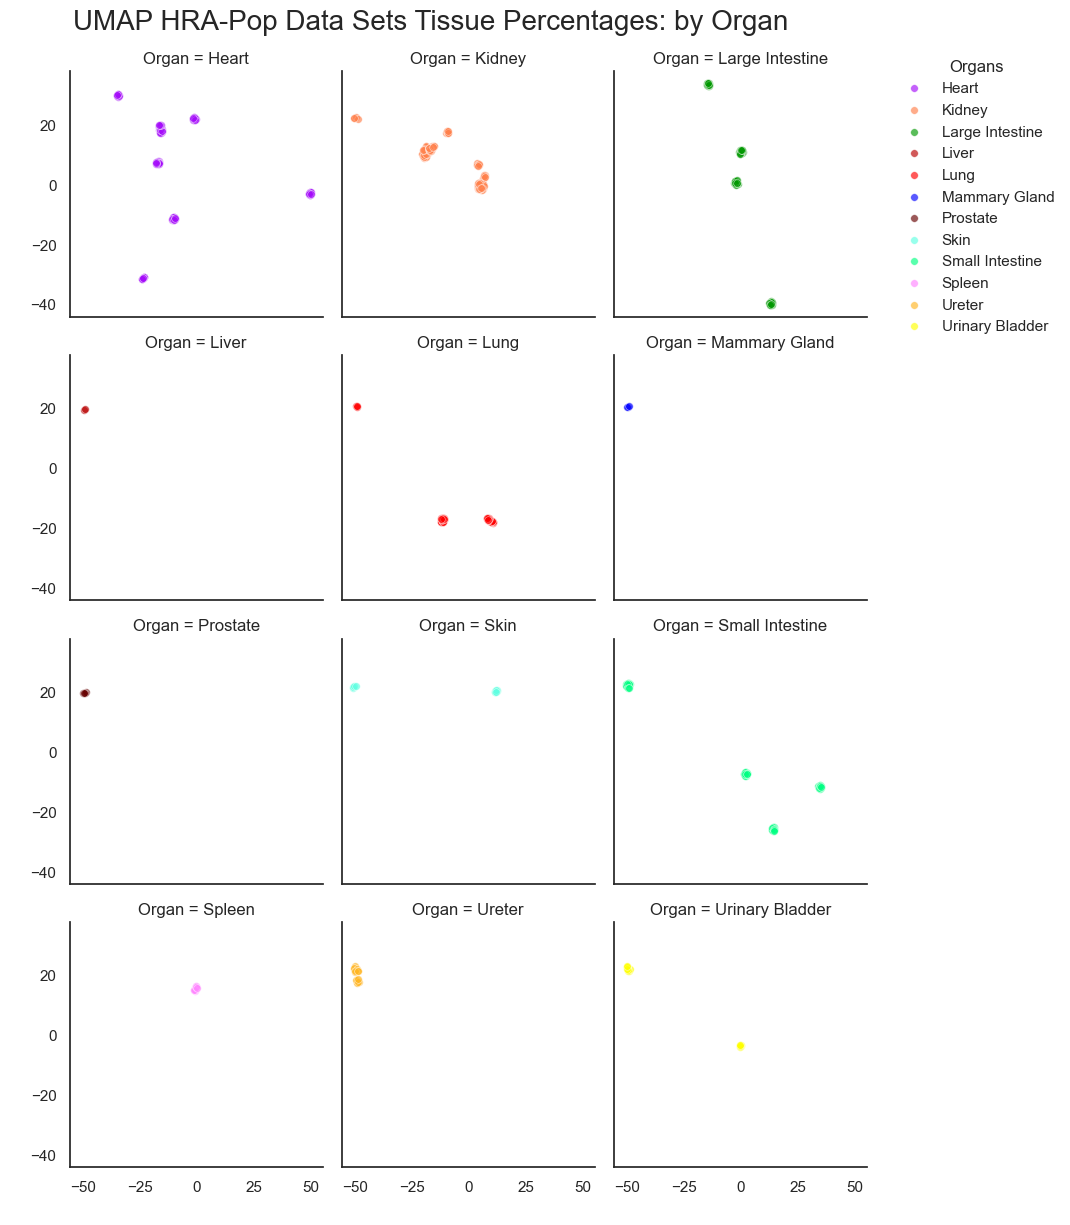

In [235]:
# Small Multiples of UMAP Results - by Organ
g = sns.FacetGrid(embedding3, col='organ', hue='organ', col_wrap=3)
g.map_dataframe(sns.scatterplot, 
                x ='0', y ='1', 
                s=30, alpha=0.65)
g.add_legend(loc="upper left", bbox_to_anchor=(.85, .99), title="Organs")
g.set_axis_labels(x_var=" ", y_var=" ")
g.set_titles(col_template="Organ = {col_name}")
plt.suptitle(titlestring + ": by Organ", x=.424, y=1.02, fontsize=20)